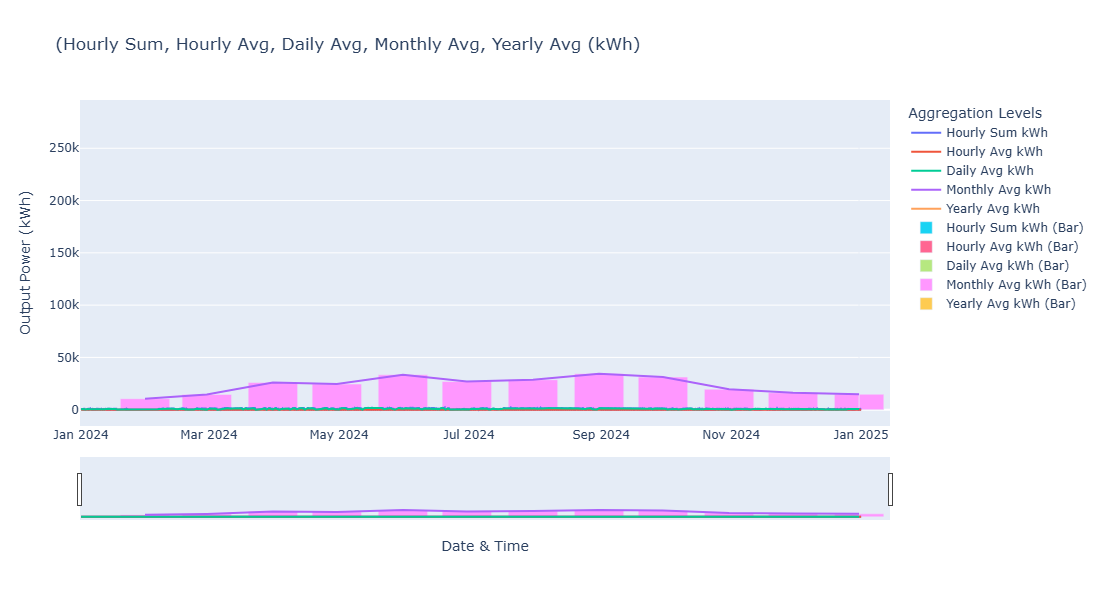

In [450]:
import pandas as pd
import plotly.graph_objects as go

file_path = "grid.csv"
df = pd.read_csv(file_path)

df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

df.set_index('DateTime', inplace=True)
df_5min_sum = df['Output_power_kW'].resample('5min').sum()
hourly_sum = df_5min_sum.resample('h').sum()

hourly_avg = hourly_sum.resample('h').mean() / 12

daily_avg = hourly_avg.resample('D').sum()

monthly_avg = daily_avg.resample('ME').sum()

yearly_avg = monthly_avg.resample('YE').sum()
aggregated_data = pd.DataFrame({
    'Hourly Sum': hourly_sum,
    'Hourly Avg': hourly_avg,
    'Daily Avg': daily_avg,
    'Monthly Avg': monthly_avg,
    'Yearly Avg': yearly_avg
}).reset_index()

fig = go.Figure(layout=go.Layout(height=600, width=1100))


fig.add_trace(go.Scatter(x=hourly_sum.index, y=hourly_sum, mode='lines', name='Hourly Sum kWh'))
fig.add_trace(go.Scatter(x=hourly_avg.index, y=hourly_avg, mode='lines', name='Hourly Avg kWh'))
fig.add_trace(go.Scatter(x=daily_avg.index, y=daily_avg, mode='lines', name='Daily Avg kWh'))
fig.add_trace(go.Scatter(x=monthly_avg.index, y=monthly_avg, mode='lines', name='Monthly Avg kWh'))
fig.add_trace(go.Scatter(x=yearly_avg.index, y=yearly_avg, mode='lines', name='Yearly Avg kWh'))

fig.add_trace(go.Bar(x=hourly_sum.index, y=hourly_sum, name='Hourly Sum kWh (Bar)'))
fig.add_trace(go.Bar(x=hourly_avg.index, y=hourly_avg, name='Hourly Avg kWh (Bar)'))
fig.add_trace(go.Bar(x=daily_avg.index, y=daily_avg, name='Daily Avg kWh (Bar)'))
fig.add_trace(go.Bar(x=monthly_avg.index, y=monthly_avg, name='Monthly Avg kWh (Bar)'))
fig.add_trace(go.Bar(x=yearly_avg.index, y=yearly_avg, name='Yearly Avg kWh (Bar)'))

fig.update_layout(
    title="(Hourly Sum, Hourly Avg, Daily Avg, Monthly Avg, Yearly Avg (kWh)",
    xaxis_title="Date & Time",
    yaxis_title="Output Power (kWh)",
    barmode='overlay',
    legend_title="Aggregation Levels",
    xaxis_rangeslider_visible=True
)

fig.show()

aggregated_data.to_csv("averaged_data.csv", index=False)
